In [17]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from sklearn import datasets, svm

In [73]:
class SVM:
    def __init__(self, learning_rate = 0.01, _lambda = 0.1, n_iterations = 10000):
        self.lr = learning_rate
        self._lambda = _lambda
        self.iterations = n_iterations
        self.weight = None
        self.bias = None
        
    def should_stop(self, ite, old_weight, old_bias):
        if ite == self.iterations: return True
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        ite = 1
        old_weight = None
        old_bias = None
        y_labels = np.where(y <= 0, -1, 1)
        self.weight =  np.random.normal(0, 1, n_features)
        self.bias = np.random.normal(0, 1, 1)
        
        while not self.should_stop(ite, old_weight, old_bias):
            ite += 1
            old_weight = self.weight
            old_bias = self.bias
            for idx, data in enumerate(X):
                condition = y_labels[idx] * (self.weight.T @ data + self.bias) > 1
                if condition:
                    self.weight -= self.lr * (self._lambda * self.weight)
                else:
                    self.weight -= self.lr * (self._lambda * self.weight - y_labels[idx] * data)
                    self.bias += self.lr * y_labels[idx]
                    
                    
    def predict(self, X):
        result = self.weight.T @ X.T + self.bias
        result = np.where(result > 1, 1, result)
        result = np.where(result < -1, -1, result)
        return result
            

In [74]:
clf = SVM()

In [84]:
center = [[1,1], [2,2]]
cov = [[1, 0], [0, 1]]
n_samples = 100

X0 = np.random.multivariate_normal(center[0], cov, n_samples)
X1 = np.random.multivariate_normal(center[1], cov, n_samples)
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(n_samples), -np.ones(n_samples)), axis = 0)

idx = np.random.permutation(2 * n_samples)
X, y = X[idx], y[idx]

X_train = X[: int(0.77 * n_samples * 2)]
y_train = y[: int(0.77 * n_samples * 2)]
X_test = X[int(0.77 * n_samples * 2): ]
y_test = y[int(0.77 * n_samples * 2):]

In [85]:
clf.fit(X_train, y_train)

In [86]:
clf.predict(X_test)

array([-0.20050596,  0.85020353, -1.        ,  1.        , -0.27656643,
        0.19989506, -0.27401836, -1.        , -0.32299586,  0.45485859,
       -1.        , -1.        ,  1.        , -0.18055096,  0.22644572,
       -0.16277166,  0.67432216, -1.        ,  0.55310468,  0.39916808,
        0.96835396,  1.        , -0.7152951 ,  0.80204009,  1.        ,
        1.        , -0.12672572, -1.        , -1.        ,  0.27117745,
       -0.5988319 , -0.46114199, -0.14291354, -1.        , -1.        ,
       -1.        , -0.67163892, -0.36781732, -0.57441134,  0.56114304,
       -0.04583196,  1.        , -1.        , -1.        ,  1.        ,
       -1.        ])

In [87]:
X_min, X_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
Y_min, Y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(X_min, X_max, .01), np.arange(Y_min, Y_max, .01))

In [88]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

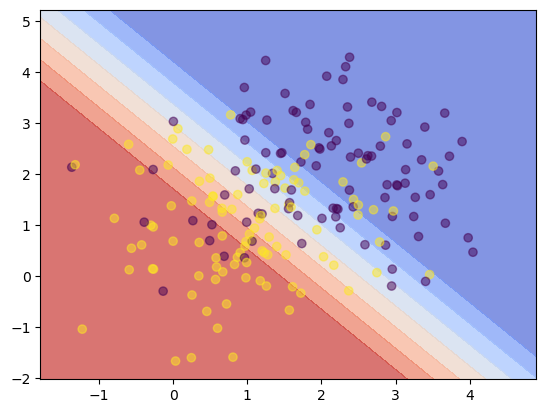

In [89]:
plt.clf()
plt.contourf(xx, yy, Z, cmap = cm.coolwarm, alpha = .7)
plt.scatter(X[:, 0], X[:, 1], alpha = .5, c = y)

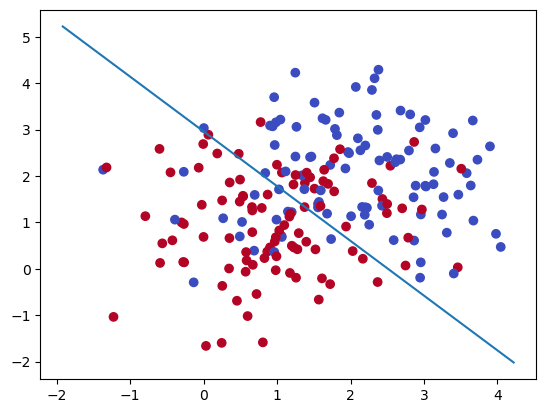

In [90]:
yy1 = np.arange(Y_min, Y_max, .01)
xx1 = -1 / clf.weight[0] *(clf.bias + yy1 * clf.weight[1])

plt.plot(xx1, yy1)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cm.coolwarm)